### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта
## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения
##### Студент:  Маслова Анастасия
##### Группа:   НКНбд-01-21
## Москва 2024
***


В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:  

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.

2. Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте несколько изображений.

3. Постройте нейронные сети MLP, CNN и RNN для задачи многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании), используя функцию потерь, указанную в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте обучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд. Для каждой нейронной сети выведите количество потребовавшихся эпох обучения.  

4. Оцените качество многоклассовой классификации нейронными сетями MLP, CNN и RNN на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите архитектуру нейронной сети с лучшим качеством.  

5. Визуализируйте кривые обучения трех построенных моделей для показателя потерь на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).

6. Визуализируйте кривые обучения трех построенных моделей для показателя доли верных ответов на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

7. Используя модель нейронной сети с лучшей долей верных ответов на тестовой выборке, определите для каждого из классов два изображения в тестовой выборке, имеющие минимальную и максимальную вероятности классификации в правильный класс, и визуализируйте эти изображения.

Вариант 23

1. Набор данных oxford_iiit_pet с изменением разрешения до 96х64

2. Классы с метками 3,14,25,35,36

3. Требования к архитектуре сети MLP:

Функциональный API при создании

Функция потерь: категориальная кросс-энтропия

Кол-во скрытых слоев 6

Кол-во нейронов 50 в первом скрытом слое, увеличивающееся на 5 с каждым последующим скрытым слоем

Использование слоев с регуляризацией L2

4. Требования к архитектуре сети CNN:

Последовательный API со списком слоев при создании

Функция потерь: разреженная категориальная кросс-энтропия

Кол-во сверточных слоев 3

Количество фильтров в сверточных слоях 16

Размеры фильтра 5х5

Использование слоев пакетной нормализации

5. Требования к архитектуре сети RNN:

Последовательный API с методом add() при создании

Функция потерь: категориальная кросс-энтропия

Слой LSTM с 64 нейронами

Использование слоев dropout

6. Показатель качества многоклассовой классификации:

минимальная полнота классов, где полнота (recall) класса равна доле правильных предсказаний для всех точек, принадлежащих этому классу.

### Решение

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image, ImageOps

In [126]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.regularizers import l1_l2

In [127]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [128]:
ds = tfds.load('oxford_iiit_pet', split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'])
df_train = tfds.as_dataframe(ds[0])
df_val = tfds.as_dataframe(ds[1])
df_test = tfds.as_dataframe(ds[2])
df_train.head(3)

,file_name,image,label,segmentation_mask,species
0,b'Sphynx_158.jpg',"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,b'english_cocker_spaniel_135.jpg',"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",12,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
2,b'British_Shorthair_181.jpg',"[[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...",9,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


In [129]:
df_train.shape, df_val.shape, df_test.shape

((2944, 5), (368, 5), (368, 5))

2. Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте несколько изображений.

In [130]:
x = df_train[df_train['label'] == 3]
y = df_train[df_train['label'] == 14]
z = df_train[df_train['label'] == 25]
a = df_train[df_train['label'] == 35]
b = df_train[df_train['label'] == 36]

x['label'] = 0
y['label'] = 1
z['label'] = 2
a['label'] = 3
b['label'] = 4

df_train1 = pd.concat([x, y, z, a, b])
Y_train1 = df_train1['label']
df_train1 = df_train1['image']

x = df_test[df_test['label'] == 3]
y = df_test[df_test['label'] == 14]
z = df_test[df_test['label'] == 25]
v = df_test[df_test['label'] == 35]
z = df_test[df_test['label'] == 36]

x['label'] = 0
y['label'] = 1
z['label'] = 2
a['label'] = 3
b['label'] = 4

df_test1 = pd.concat([x, y, z, a, b])
Y_test1 = df_test1['label']
df_test1 = df_test1['image']

x = df_val[df_val['label'] == 3]
y = df_val[df_val['label'] == 14]
z = df_val[df_val['label'] == 25]
a = df_val[df_val['label'] == 35]
b = df_val[df_val['label'] == 36]

x['label'] = 0
y['label'] = 1
z['label'] = 2
a['label'] = 3
b['label'] = 4
df_val1 = pd.concat([x, y, z, a, b])
Y_val1 = df_val1['label']
df_val1 = df_val1['image']


Y_train1.value_counts()

<ipython-input-130-472133ecd876>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['label'] = 0
<ipython-input-130-472133ecd876>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label'] = 1
<ipython-input-130-472133ecd876>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

label
4    86
3    84
0    80
1    79
2    77
Name: count, dtype: int64

In [131]:
df_train1.head()

15     [[[250, 212, 41], [245, 218, 41], [252, 222, 4...
80     [[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ...
97     [[[124, 21, 24], [125, 22, 25], [126, 23, 26],...
101    [[[6, 0, 28], [7, 0, 31], [6, 1, 31], [7, 0, 3...
122    [[[171, 143, 129], [169, 140, 134], [169, 137,...
Name: image, dtype: object

In [132]:
df_train1[15].shape

(375, 500, 3)

In [133]:
Y_train1.shape

(406,)

In [134]:
Y_train2 = list(Y_train1)
Y_test2 = list(Y_test1)
Y_val2 = list(Y_val1)

for i in range(len(Y_train2)):
    tmp = [0]*5
    tmp[Y_train2[i]] = 1
    Y_train2[i] = tmp
for i in range(len(Y_test2)):
    tmp = [0]*5
    tmp[Y_test2[i]] = 1
    Y_test2[i] = tmp
for i in range(len(Y_val2)):
    tmp = [0]*5
    tmp[Y_val2[i]] = 1
    Y_val2[i] = tmp

In [135]:
Y_train1 = np.array(Y_train1)
Y_train2 = np.array(Y_train2)
Y_test1 = np.array(Y_test1)
Y_test2 = np.array(Y_test2)
Y_val1 = np.array(Y_val1)
Y_val2 = np.array(Y_val2)

In [136]:
import random

def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)

    num_row = 2
    num_col = 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i]
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

In [137]:
df_tr = np.zeros(shape=(df_train1.shape[0],64,96,3), dtype=np.float32)
df_te  = np.zeros(shape=(df_test1.shape[0],64,96,3), dtype=np.float32)
df_va  = np.zeros(shape=(df_val1.shape[0],64,96,3), dtype=np.float32)

for i in range(len(df_train1)):
    df_tr[i,:,:,:] = np.array(Image.fromarray(df_train1.iloc[i]).resize((96,64)))
for i in range(len(df_test1)):
    df_te[i,:,:,:] = np.array(Image.fromarray(df_test1.iloc[i]).resize((96,64)))
for i in range(len(df_val1)):
    df_va[i,:,:,:] = np.array(Image.fromarray(df_val1.iloc[i]).resize((96,64)))

df_tr /= 255
df_te /= 255
df_va /= 255

In [138]:
df_tr.shape, Y_train1.shape

((406, 64, 96, 3), (406,))

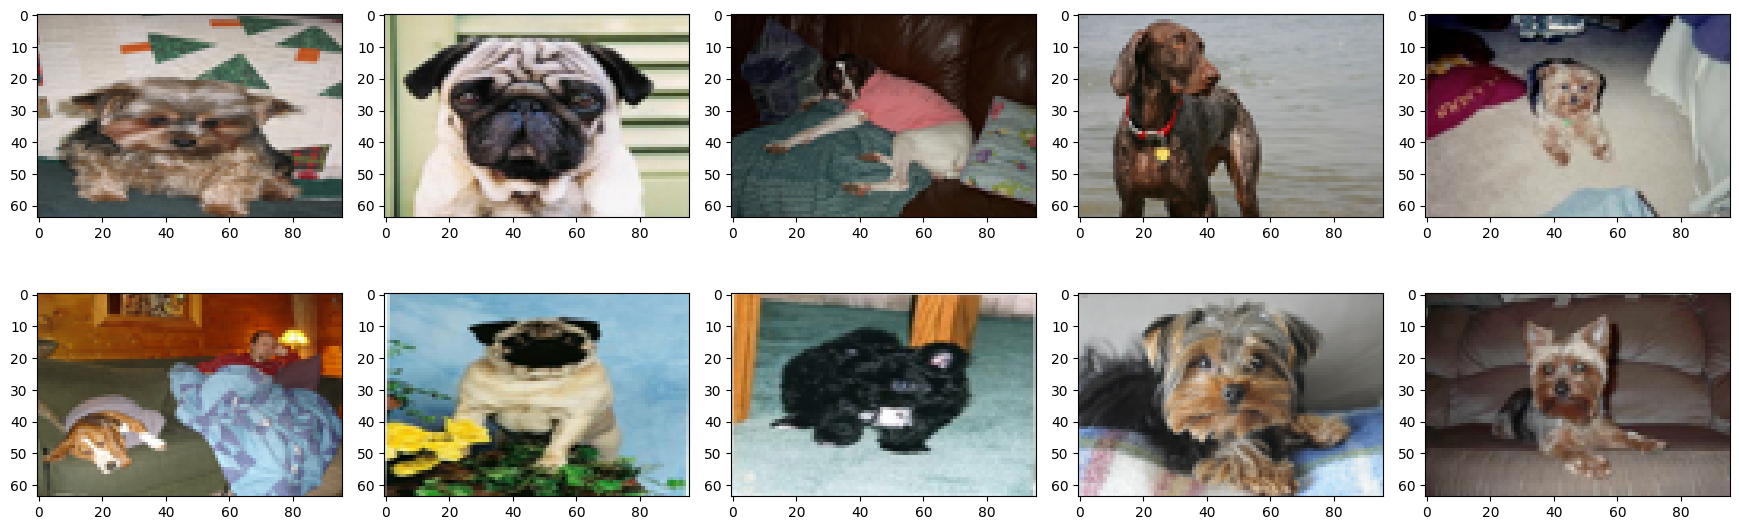

In [139]:
plot_random_sample(df_tr)

3. Постройте нейронные сети MLP, CNN и RNN для задачи многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании), используя функцию потерь, указанную в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте обучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд. Для каждой нейронной сети выведите количество потребовавшихся эпох обучения.

Требования к архитектуре сети MLP:

Функциональный API при создании

Функция потерь: категориальная кросс-энтропия

Кол-во скрытых слоев 6

Кол-во нейронов 50 в первом скрытом слое, увеличивающееся на 5 с каждым последующим скрытым слоем

Использование слоев с регуляризацией L2

In [140]:
from tensorflow.keras.utils import to_categorical

# Convert target data to one-hot encoded format
Y_train1_encoded = to_categorical(Y_train1, num_classes=5)
Y_val1_encoded = to_categorical(Y_val1, num_classes=5)

In [141]:
inputs = tf.keras.Input(shape=(64, 96, 3))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(50, activation="leaky_relu")(x)
x = tf.keras.layers.Dense(55, activation="leaky_relu", kernel_regularizer='l2')(x)
x = tf.keras.layers.Dense(60, activation="leaky_relu")(x)
x = tf.keras.layers.Dense(65, activation="leaky_relu", kernel_regularizer='l2')(x)
x = tf.keras.layers.Dense(70, activation="leaky_relu")(x)
x = tf.keras.layers.Dense(75, activation="leaky_relu", kernel_regularizer='l2')(x)
outputs = tf.keras.layers.Dense(5, activation="softmax")(x)

In [142]:
mlp = tf.keras.Model(inputs=inputs, outputs=outputs)
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
            loss=CategoricalCrossentropy(),
            metrics=['categorical_accuracy'])

In [143]:
history1 = mlp.fit(
    df_tr,
    Y_train1_encoded,
    epochs=50,
    validation_data=(df_va, Y_val1_encoded),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
    batch_size=29
    )

Epoch 1/50
14/14 [==============================] - 2s 23ms/step - loss: 4.1590 - categorical_accuracy: 0.1872 - val_loss: 3.4305 - val_categorical_accuracy: 0.2143
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 3.4909 - categorical_accuracy: 0.2414 - val_loss: 3.4135 - val_categorical_accuracy: 0.2143
Epoch 3/50
14/14 [==============================] - 0s 7ms/step - loss: 3.2956 - categorical_accuracy: 0.2931 - val_loss: 3.1635 - val_categorical_accuracy: 0.3571
Epoch 4/50
14/14 [==============================] - 0s 8ms/step - loss: 3.1424 - categorical_accuracy: 0.3522 - val_loss: 3.1537 - val_categorical_accuracy: 0.3095
Epoch 5/50
14/14 [==============================] - 0s 8ms/step - loss: 3.0663 - categorical_accuracy: 0.3374 - val_loss: 3.0730 - val_categorical_accuracy: 0.3095
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 3.0129 - categorical_accuracy: 0.3227 - val_loss: 3.2396 - val_categorical_accuracy: 0.2857
Epoch 7/50
14/1

Требования к архитектуре сети CNN:

Последовательный API со списком слоев при создании

Функция потерь: разреженная категориальная кросс-энтропия

Кол-во сверточных слоев 3

Количество фильтров в сверточных слоях 16

Размеры фильтра 5х5

Использование слоев пакетной нормализации

In [144]:
Y_train1_integer = np.argmax(Y_train1_encoded, axis=1)
Y_val1_integer = np.argmax(Y_val1_encoded, axis=1)

In [145]:
cnn = tf.keras.Sequential([
    tf.keras.Input(shape=(64, 96, 3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='selu', kernel_regularizer='l1_l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='selu', kernel_regularizer='l1_l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='selu', kernel_regularizer='l1_l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [146]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [147]:
history2 = cnn.fit(
    df_tr,
    Y_train1_integer,
    epochs=30,
    validation_data=(df_va, Y_val1_integer),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
    batch_size=29
    )

Epoch 1/30
14/14 [==============================] - 2s 35ms/step - loss: 8.0752 - accuracy: 0.3103 - val_loss: 8.9755 - val_accuracy: 0.2381
Epoch 2/30
14/14 [==============================] - 0s 12ms/step - loss: 6.6065 - accuracy: 0.5616 - val_loss: 7.1391 - val_accuracy: 0.1905
Epoch 3/30
14/14 [==============================] - 0s 12ms/step - loss: 5.3976 - accuracy: 0.6798 - val_loss: 5.7146 - val_accuracy: 0.2143
Epoch 4/30
14/14 [==============================] - 0s 12ms/step - loss: 4.4416 - accuracy: 0.7291 - val_loss: 4.9298 - val_accuracy: 0.1905
Epoch 5/30
14/14 [==============================] - 0s 11ms/step - loss: 3.6341 - accuracy: 0.7537 - val_loss: 4.3097 - val_accuracy: 0.2143
Epoch 6/30
14/14 [==============================] - 0s 12ms/step - loss: 3.0501 - accuracy: 0.7586 - val_loss: 3.9782 - val_accuracy: 0.1905
Epoch 7/30
14/14 [==============================] - 0s 14ms/step - loss: 2.6773 - accuracy: 0.7414 - val_loss: 3.6842 - val_accuracy: 0.1905
Epoch 8/30
14

Требования к архитектуре сети RNN:

Последовательный API с методом add() при создании

Функция потерь: категориальная кросс-энтропия

Слой LSTM с 64 нейронами

Использование слоев dropout

In [148]:
df_tr2 = df_tr.reshape(df_tr.shape[0], df_tr.shape[-1], -1)
df_te2 = df_te.reshape(df_te.shape[0], df_te.shape[-1], -1)
df_va2 = df_va.reshape(df_va.shape[0], df_va.shape[-1], -1)

In [149]:
rnn = tf.keras.Sequential()
rnn.add(tf.keras.layers.LSTM(64))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.Dense(5, activation="softmax"))

In [150]:
rnn.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [151]:
history3 = rnn.fit(df_tr2,
                  Y_train2,
                  epochs=50,
                  validation_data=(df_va2, Y_val2),
                  batch_size=14,
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
29/29 [==============================] - 2s 21ms/step - loss: 1.6611 - accuracy: 0.1847 - val_loss: 1.5885 - val_accuracy: 0.2857
Epoch 2/50
29/29 [==============================] - 0s 6ms/step - loss: 1.5949 - accuracy: 0.2414 - val_loss: 1.5681 - val_accuracy: 0.2619
Epoch 3/50
29/29 [==============================] - 0s 7ms/step - loss: 1.5667 - accuracy: 0.2759 - val_loss: 1.5693 - val_accuracy: 0.2143
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 1.5436 - accuracy: 0.3128 - val_loss: 1.5501 - val_accuracy: 0.3095
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 1.5054 - accuracy: 0.3645 - val_loss: 1.4876 - val_accuracy: 0.3571
Epoch 6/50
29/29 [==============================] - 0s 7ms/step - loss: 1.4613 - accuracy: 0.3842 - val_loss: 1.6075 - val_accuracy: 0.2857
Epoch 7/50
29/29 [==============================] - 0s 5ms/step - loss: 1.4602 - accuracy: 0.4039 - val_loss: 1.4423 - val_accuracy: 0.3571
Epoch 8/50
29/29 [=

In [152]:
print("MLP epochs:", len(history1.history['loss']))
print("RNN epochs:", len(history2.history['loss']))
print("CNN epochs:", len(history3.history['loss']))

MLP epochs: 24
RNN epochs: 15
CNN epochs: 16


4. Оцените качество многоклассовой классификации нейронными сетями MLP, CNN и RNN на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите архитектуру нейронной сети с лучшим качеством.

Показатель качества многоклассовой классификации:
минимальная полнота классов, где полнота (recall) класса равна доле правильных предсказаний для всех точек, принадлежащих этому классу.

In [154]:
X1 = mlp.predict(df_te)
X2 = cnn.predict(df_te)
X3 = rnn.predict(df_te2)

7/7 [==============================] - 1s 3ms/step


In [159]:
for i in range(len(X1)):
    for j in range(len(X1[i])):
        if X1[i][j] == max(X1[i]):
            X1[i][j] = 1
        else:
            X1[i][j] = 0
for i in range(len(X2)):
    for j in range(len(X2[i])):
        if X2[i][j] == max(X2[i]):
            X2[i][j] = 1
        else:
            X2[i][j] = 0
for i in range(len(X3)):
    for j in range(len(X3[i])):
        if X3[i][j] == max(X3[i]):
            X3[i][j] = 1
        else:
            X3[i][j] = 0

In [160]:
X11 = np.array(X1, dtype=np.int32)
X22 = np.array(X2, dtype=np.int32)
X33 = np.array(X3, dtype=np.int32)

m1 = tf.keras.metrics.Recall()
m2 = tf.keras.metrics.Recall()
m3 = tf.keras.metrics.Recall()

m1.update_state(X11, Y_test2)
m2.update_state(X22, Y_test2)
m3.update_state(X33, Y_test2)


In [161]:
m1.result().numpy(), m2.result().numpy(), m3.result().numpy()

(0.53, 0.42, 0.45)

In [122]:
mlp.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 96, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_12 (Dense)            (None, 50)                921650    
                                                                 
 dense_13 (Dense)            (None, 55)                2805      
                                                                 
 dense_14 (Dense)            (None, 60)                3360      
                                                                 
 dense_15 (Dense)            (None, 65)                3965      
                                                                 
 dense_16 (Dense)            (None, 70)                4620

5. Визуализируйте кривые обучения трех построенных моделей для показателя потерь на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).

In [123]:
a1 = history1.history['val_loss']
a1 = [x/history1.history['val_loss'][0] for x in a1]
a2 = history2.history['val_loss']
a2 = [x/history2.history['val_loss'][0] for x in a2]
a3 = history3.history['val_loss']
a3 = [x/history3.history['val_loss'][0] for x in a3]

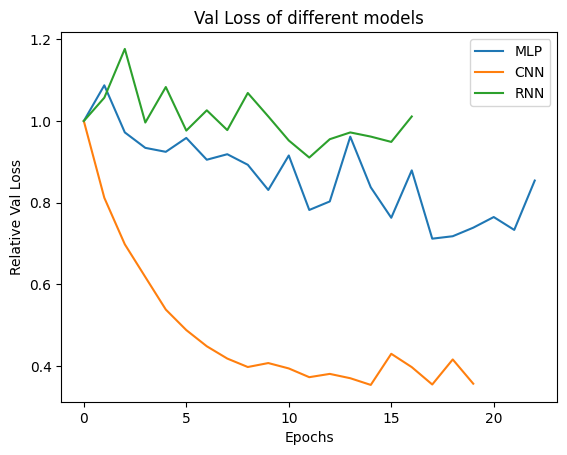

In [124]:
plt.plot([i for i in range(len(history1.history['val_loss']))], a1, label='MLP')
plt.plot([i for i in range(len(history2.history['val_loss']))], a2, label='CNN')
plt.plot([i for i in range(len(history3.history['val_loss']))], a3, label='RNN')
plt.xlabel('Epochs')
plt.ylabel('Relative Val Loss')
plt.title('Val Loss of different models')
plt.legend();

6. Визуализируйте кривые обучения трех построенных моделей для показателя доли верных ответов на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

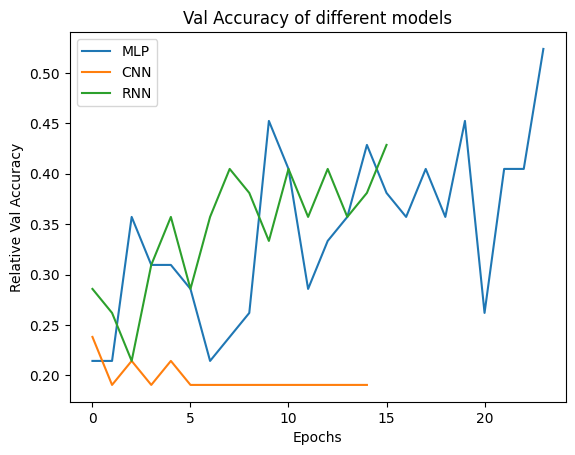

In [169]:
plt.plot([i for i in range(len(history1.history['val_categorical_accuracy']))], history1.history['val_categorical_accuracy'], label='MLP')
plt.plot([i for i in range(len(history2.history['val_accuracy']))], history2.history['val_accuracy'], label='CNN')
plt.plot([i for i in range(len(history3.history['val_accuracy']))], history3.history['val_accuracy'], label='RNN')
plt.xlabel('Epochs')
plt.ylabel('Relative Val Accuracy')
plt.title('Val Accuracy of different models')
plt.legend();

7. Используя модель нейронной сети с лучшей долей верных ответов на тестовой выборке, определите для каждого из классов два изображения в тестовой выборке, имеющие минимальную и максимальную вероятности классификации в правильный класс, и визуализируйте эти изображения.

In [172]:
A = [0]*5 # max
B = [0]*5 # min

for i in range(len(X1)):
    for j in range(len(X1[i])):
        if X1[i][j] > X1[A[j]][j] and Y_test2[i][j] == 1:
            A[j] = i

        if X1[i][j] < X1[B[j]][j] and Y_test2[i][j] == 1:
            B[j] = i

A, B

([1, 0, 27, 30, 114], [0, 18, 0, 0, 0])

Class 1.

Max

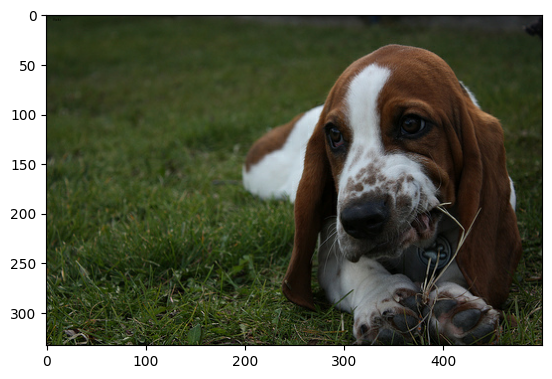

In [174]:
plt.imshow(Image.fromarray(df_test1.iloc[A[0]]))

Min

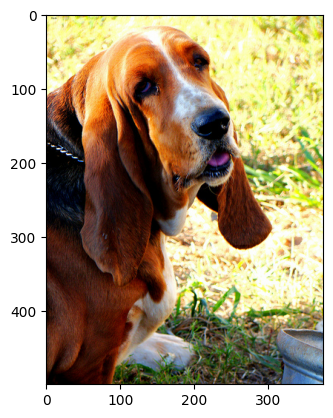

In [175]:
plt.imshow(Image.fromarray(df_test1.iloc[B[0]]))

Class 2

Max

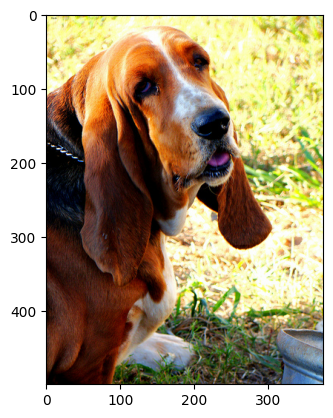

In [176]:
plt.imshow(Image.fromarray(df_test1.iloc[A[1]]))

Min

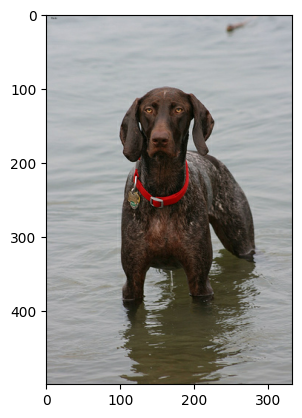

In [177]:
plt.imshow(Image.fromarray(df_test1.iloc[B[1]]))

Class 3

Max

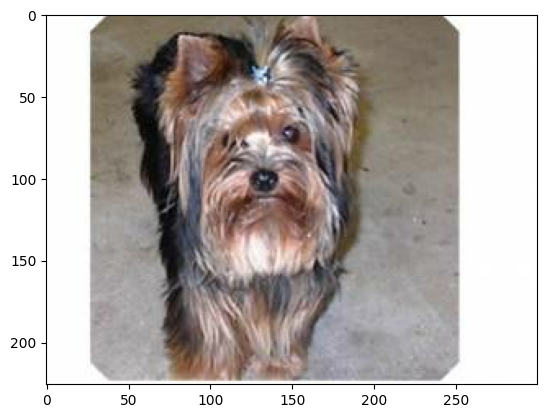

In [178]:
plt.imshow(Image.fromarray(df_test1.iloc[A[2]]))

Min

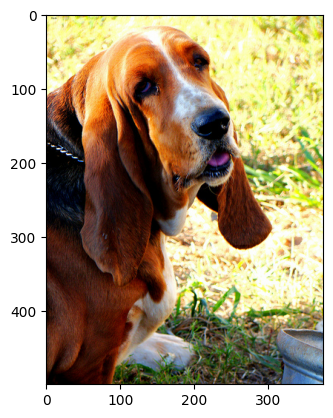

In [179]:
plt.imshow(Image.fromarray(df_test1.iloc[B[2]]))

Class 4

Max

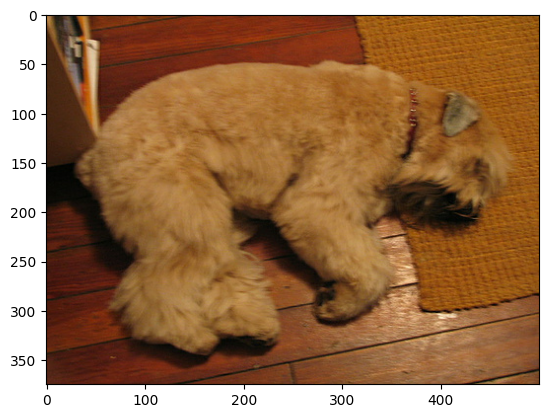

In [180]:
plt.imshow(Image.fromarray(df_test1.iloc[A[3]]))

Min

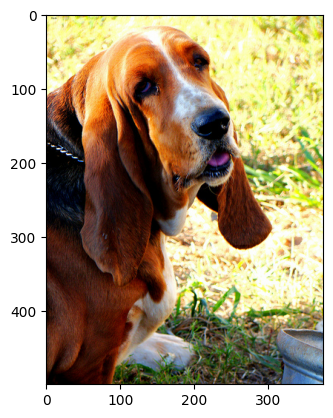

In [181]:
plt.imshow(Image.fromarray(df_test1.iloc[B[3]]))

Class 5

Max

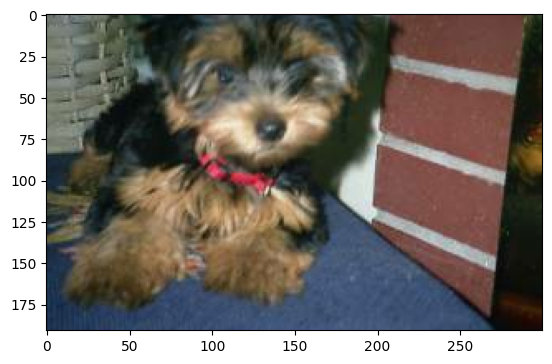

In [182]:
plt.imshow(Image.fromarray(df_test1.iloc[A[4]]))

Min

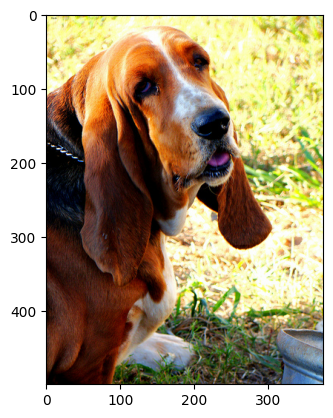

In [183]:
plt.imshow(Image.fromarray(df_test1.iloc[B[4]]))